<a href="https://colab.research.google.com/github/ibrahim10sy/learn-python/blob/main/Metric_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Évaluation des modèles de classification**

Objectifs

* Mettre en œuvre et évaluer les performances des modèles de classification sur des données réelles
* Interpréter et comparer différentes mesures d'évaluation et la matrice de confusion de chaque modèle

# **Introduction**

Utilisez l'ensemble de données sur le cancer du sein inclus dans scikit-learn pour prédire si une tumeur est bénigne ou maligne.

Créez deux modèles de classification et évaluez-les.

Ajoutez un bruit aléatoire gaussien aux caractéristiques pour simuler les erreurs de mesure.

L'interprétation et la comparaison des différentes métriques d'évaluation et de la matrice de confusion de chaque modèle vous fourniront des informations précieuses sur la signification des métriques d'évaluation et leur impact potentiel sur votre interprétation des performances du modèle.

L'objectif de ce laboratoire n'est pas de trouver le meilleur classificateur ; il est principalement destiné à vous entraîner à interpréter et à comparer les résultats dans le contexte d'un problème concret.

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
labels = data.target_names
feature_names = data.feature_names

In [3]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
labels

array(['malignant', 'benign'], dtype='<U9')

In [5]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [7]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Ajoutez du bruit
Ensuite, ajoutez du bruit pour simuler une erreur de mesure aléatoire, puis visualisez les premières lignes des caractéristiques originales et bruyantes à des fins de comparaison.

In [9]:
# Add Gaussian noise to the data set
np.random.seed(42)
noise_factor = 0.5 # pour contrôler la quantité de bruit
X_noisy = X_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)

# Charger les ensembles de données originaux et bruyants dans un DataFrame à des fins de comparaison et de visualisation
df = pd.DataFrame(X_scaled, columns=feature_names)
df_noisy = pd.DataFrame(X_noisy, columns=feature_names)

In [ ]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [10]:
df_noisy.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.345421,-2.142467,1.593778,1.745890,1.451390,3.166446,3.442480,2.916193,1.982778,2.527027,...,2.619514,-1.472182,2.337365,1.288863,1.035495,2.672126,1.534030,2.483925,2.450303,1.791168
1,1.528967,0.572507,1.679206,1.379853,-0.415690,-1.097493,0.080586,-0.431691,-0.662701,-0.770222,...,1.967969,-0.561744,1.196665,2.196327,0.139888,0.035196,-0.566358,0.932478,-0.078258,0.768963
2,1.340301,0.363357,1.013336,0.960780,1.348473,1.731046,1.327473,2.538997,1.120503,-0.720568,...,1.402034,0.154582,2.086422,1.197149,0.123161,0.832054,1.312675,2.119376,0.887375,0.458025
3,-0.720371,0.738055,-0.943714,-0.928295,3.087499,2.671152,2.063957,1.582235,2.869940,4.793626,...,-1.240850,0.120727,-0.219824,0.681600,3.298094,4.044171,1.972232,1.591447,6.617453,5.310977
4,2.145813,-1.606510,2.477970,1.125304,0.573800,1.634568,0.875743,1.145344,0.040265,-0.814188,...,1.412305,-0.813199,0.534798,1.313041,0.350498,0.077517,-0.005297,0.069031,-0.607382,-0.248607


# Visualisation du bruit

Histogramme

In [11]:
df[feature_names[5]]

,mean compactness
0,3.283515
1,-0.487072
2,1.052926
3,3.402909
4,0.539340
...,...
564,0.219060
565,-0.017833
566,-0.038680
567,3.272144


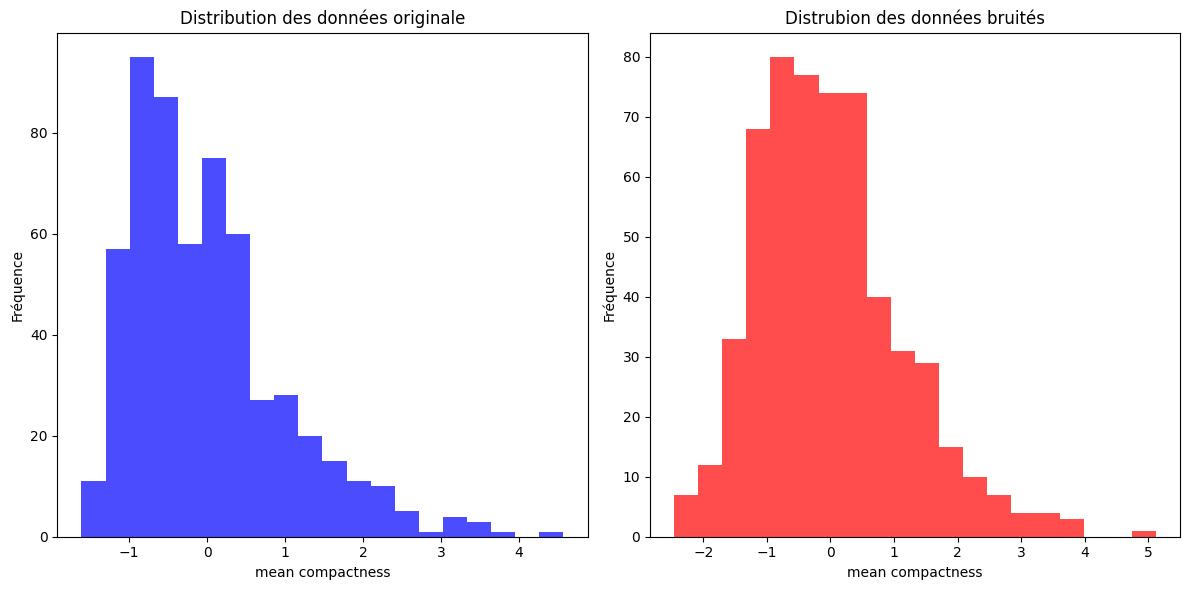

In [12]:
plt.figure(figsize=(12, 6))

# Original Feature Distribution (Noise-Free)
plt.subplot(1, 2, 1)
plt.hist(df[feature_names[5]], bins=20, alpha=0.7, color='blue', label='Original')
plt.title('Distribution des données originale')
plt.xlabel(feature_names[5])
plt.ylabel('Fréquence')

# Noisy Feature Distribution
plt.subplot(1, 2, 2)
plt.hist(df_noisy[feature_names[5]], bins=20, alpha=0.7, color='red', label='Noisy')
plt.title('Distrubion des données bruités')
plt.xlabel(feature_names[5])
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

L'histogramme sans bruit est incliné vers la gauche et semble suivre une distribution log-normale, tandis que l'histogramme bruyant est moins incliné, tendant vers une distribution normale.

Plot

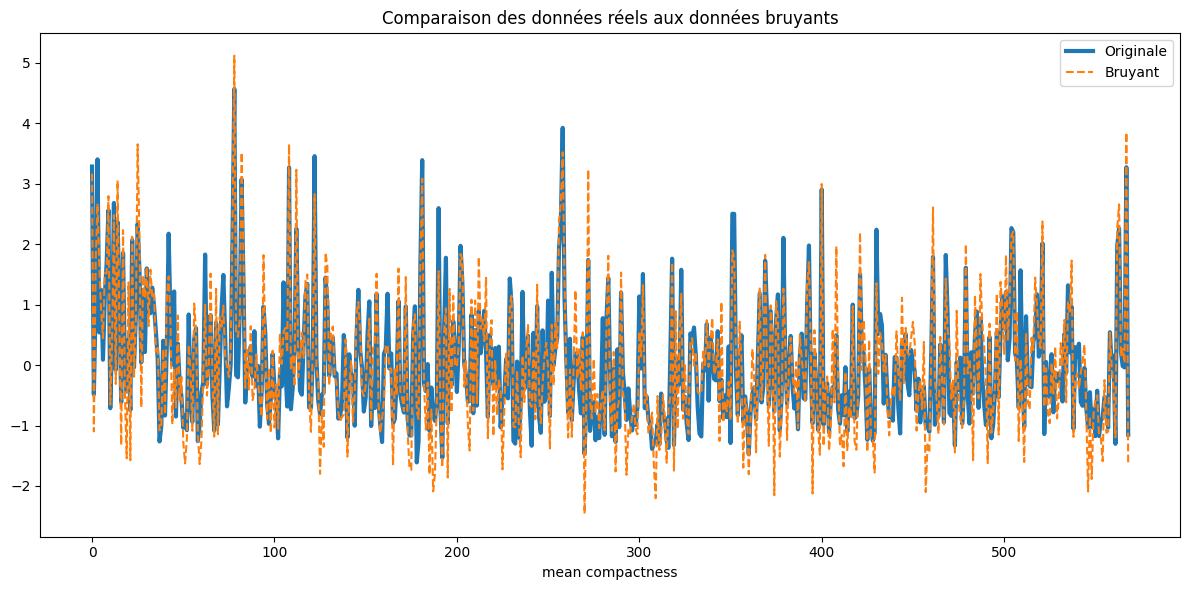

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df[feature_names[5]], label='Originale',lw=3)
plt.plot(df_noisy[feature_names[5]], '--',label='Bruyant',)
plt.title('Comparaison des données réels aux données bruyants')
plt.xlabel(feature_names[5])
plt.legend()
plt.tight_layout()
plt.show()

Scatterplot

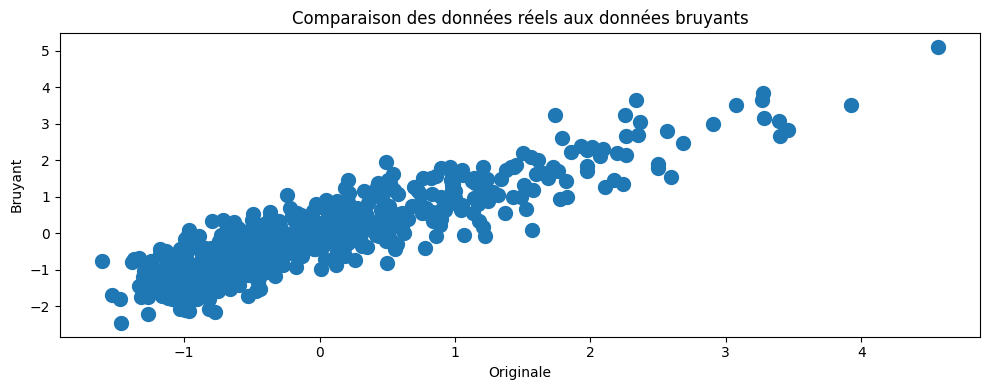

In [18]:
plt.figure(figsize=(10, 4))
plt.scatter(df[feature_names[5]], df_noisy[feature_names[5]],lw=5)
plt.title('Comparaison des données réels aux données bruyants')
plt.xlabel('Originale')
plt.ylabel('Bruyant')
plt.tight_layout()
plt.show()

Divisez les données et adaptez les modèles KNN et SVM aux données d'entraînement bruyantes

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_noisy, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialisation du modele
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', C=1, random_state=42)

In [24]:
# Entraînement du modéle
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [25]:
y_pred_knn = knn.predict(X_test)
y_pred_svm = svm.predict(X_test)

les scores de précision (f1_score) et les rapports de classification pour les deux modèles

In [26]:
print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

print("\n Raport Classification knn :")
print(classification_report(y_test, y_pred_knn))

print("\nRaport Classification svm:")
print(classification_report(y_test, y_pred_svm))

KNN Testing Accuracy: 0.936
SVM Testing Accuracy: 0.971

 Raport Classification knn :
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.94      0.96      0.95       108

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


Raport Classification svm:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        63
           1       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [19]:
def test_data(df_test):
  X_train, X_test, y_train, y_test = train_test_split(df_test, y, test_size=0.3, random_state=42)

  # Initialisation du modele
  knn = KNeighborsClassifier(n_neighbors=5)
  svm = SVC(kernel='linear', C=1, random_state=42)
  # Entraînement du modéle
  knn.fit(X_train, y_train)
  svm.fit(X_train, y_train)
  y_pred_knn = knn.predict(X_test)
  y_pred_svm = svm.predict(X_test)
  print(f"KNN Testing Accuracy: {accuracy_score(y_test, y_pred_knn):.3f}")
  print(f"SVM Testing Accuracy: {accuracy_score(y_test, y_pred_svm):.3f}")

  print("\n Raport Classification knn :")
  print(classification_report(y_test, y_pred_knn))

  print("\nRaport Classification svm:")
  print(classification_report(y_test, y_pred_svm))

In [27]:
test_data(X)

KNN Testing Accuracy: 0.959
SVM Testing Accuracy: 0.965

 Raport Classification knn :
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        63
           1       0.95      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


Raport Classification svm:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        63
           1       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



Tracer les matrices de confusion

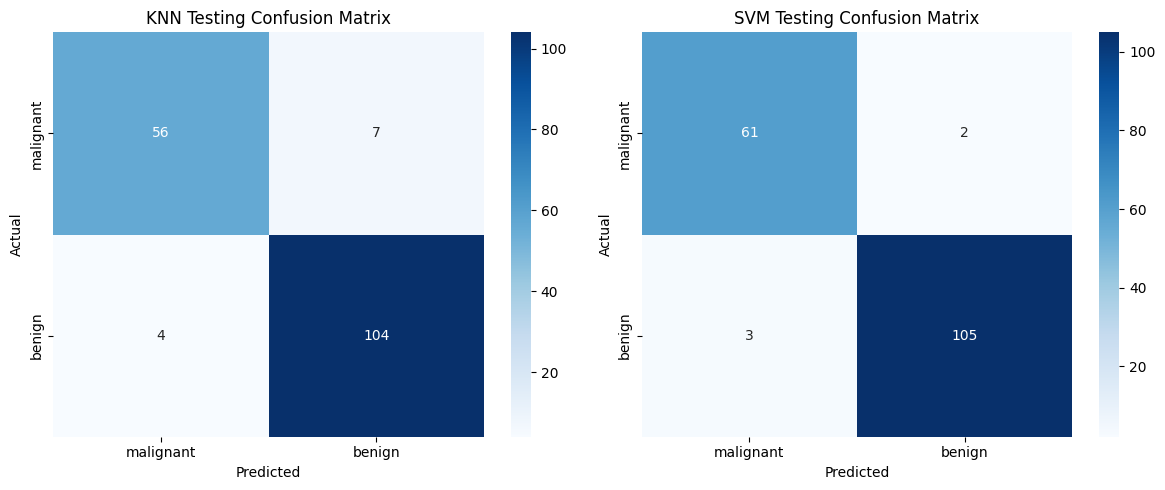

In [28]:
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Testing Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Testing Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Par convention, un test positif pour la malignité signifie qu'une masse est maligne. Ainsi, une prédiction bénigne est une prédiction négative. Le pire scénario est alors une prédiction faussement négative, où le test prédit à tort que la masse est bénigne.

Pour le modèle KNN, le nombre de faux négatifs est de 7, tandis que pour le modèle SVM, il est de 2. On peut dire que le modèle SVM a une sensibilité de prédiction plus élevée que le modèle KNN.

SVM a surpassé KNN en termes de précision, de rappel et de score F1, tant pour les classes individuelles que pour leurs moyennes globales. Cela indique que SVM est un classificateur plus performant. Bien que KNN ait obtenu d'assez bons résultats avec une précision de 94 %, SVM est plus apte à classer correctement les cas malins et bénins, avec moins d'erreurs. Étant donné que l'objectif est de choisir le modèle offrant une meilleure généralisation et moins de faux négatifs, SVM est certainement le classificateur privilégié.

# **Sommes-nous en surapprentissage ?**

Évaluons les résultats des données d'entraînement et comparons-les aux résultats des données de test.

In [29]:
y_pred_train_knn = knn.predict(X_train)
y_pred_train_svm = svm.predict(X_train)

In [30]:
# Evaluation des modèles
print(f"KNN Training Accuracy: {accuracy_score(y_train, y_pred_train_knn):.3f}")
print(f"SVM Training Accuracy: {accuracy_score(y_train, y_pred_train_svm):.3f}")

print("\nKNN Training Classification Report:")
print(classification_report(y_train, y_pred_train_knn))

print("\nSVM Training Classification Report:")
print(classification_report(y_train, y_pred_train_svm))

KNN Training Accuracy: 0.955
SVM Training Accuracy: 0.972

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       149
           1       0.95      0.98      0.96       249

    accuracy                           0.95       398
   macro avg       0.96      0.95      0.95       398
weighted avg       0.96      0.95      0.95       398


SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       149
           1       0.97      0.99      0.98       249

    accuracy                           0.97       398
   macro avg       0.97      0.97      0.97       398
weighted avg       0.97      0.97      0.97       398



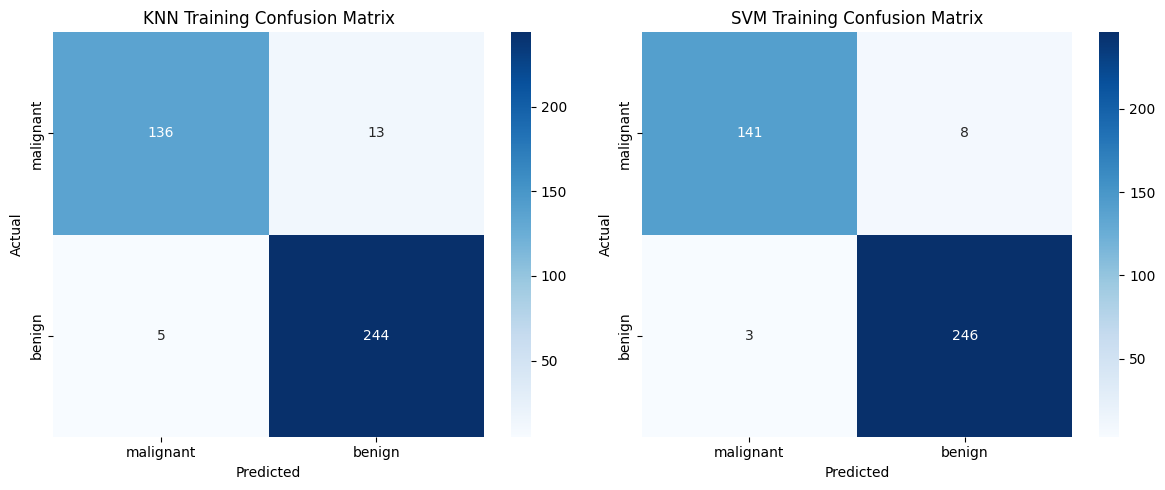

In [33]:
conf_matrix_knn = confusion_matrix(y_train,y_pred_train_knn)
conf_matrix_svm = confusion_matrix(y_train, y_pred_train_svm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_knn, annot=True, cmap='Blues', fmt='d', ax=axes[0],
            xticklabels=labels, yticklabels=labels)

axes[0].set_title('KNN Training Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', ax=axes[1],
            xticklabels=labels, yticklabels=labels)
axes[1].set_title('SVM Training Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Comparaison des précisions d'entraînement et de test des deux modèles
Que pouvez-vous dire de la précision des deux modèles sur les données d'entraînement et de test ?

Que suggèrent ces résultats ?

Idéalement, la précision d'un modèle devrait être quasiment identique sur les jeux de données d'entraînement et de test.

Il serait inhabituel que la précision soit supérieure sur l'ensemble de test, ce qui pourrait être dû au hasard ou à une fuite de données. Par exemple, nous avons normalisé l'ensemble des données plutôt que d'ajuster StandardScaler aux données d'entraînement, puis de l'appliquer séparément aux jeux d'entraînement et de test. Nous reviendrons sur ce point et sur d'autres pièges dans un autre laboratoire.

Lorsque la précision est nettement supérieure sur les données d'entraînement que sur les données de test, le modèle mémorise probablement des détails des données d'entraînement qui ne se généralisent pas aux données non observées ; le modèle est sur-adapté aux données d'entraînement.

Précision de la phase du modèle
Entraînement KNN : 95,5 %
Test KNN : 93,6 %
Entraînement SVM : 97,2 %
Test SVM : 97,1 %
Pour le modèle SVM, les précisions d'entraînement et de test sont globalement identiques, soit environ 97 %. C'est l'idéal : le modèle SVM n'est probablement pas surajusté. Cependant, pour le modèle KNN, la précision d'apprentissage est environ 2 % supérieure à la précision du test, ce qui indique un possible surajustement.

En résumé, le modèle SVM est à la fois plus convaincant et plus précis que le modèle KNN. N'oubliez pas que nous ne cherchons pas à optimiser ces modèles ; nous comparons simplement leurs performances avec un ensemble fixe d'hyperparamètres.